<b>Module

In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import random

<b>Dataset

In [2]:
# Load the Dataset
dataset = keras.datasets.mnist.load_data()

In [3]:
# Load the Train Data
train_df = pd.DataFrame(list(zip(dataset[0][0], dataset[0][1])), columns =['image', 'label'])

# Load the Test Data
test_df = pd.DataFrame(list(zip(dataset[1][0], dataset[1][1])), columns =['image', 'label'])

In [4]:
# Display the Shape of the Dataset
print("The Shape of the Train Dataset is : {}".format(train_df.shape))
print("The Shape of the Test  Dataset is : {}".format(test_df.shape))

The Shape of the Train Dataset is : (60000, 2)
The Shape of the Test  Dataset is : (10000, 2)


<b>Task No 1 (Save the DataFrame into CSV File)

In [5]:
# Save the Train Dataset into CSV
train_df.to_csv("train.csv" , index = False)

# Save the Test Dataset into CSV
test_df.to_csv("test.csv"  , index = False)

<b> Task No 2(Load the DataFrame From CSV File & Create the Dataset)

In [6]:
# Load the Train Data from CSV File
trainData = pd.read_csv("train.csv")

# Load the Test Data From CSV File
testData = pd.read_csv("test.csv")

In [7]:
# Display the Shape of the Train/Test Data
print("The Shape of the Train Data is : {}".format(trainData.shape))
print("The Shape of the Test  Data is : {}".format(testData.shape))

The Shape of the Train Data is : (60000, 2)
The Shape of the Test  Data is : (10000, 2)


In [8]:
# Display the Train Data
trainData.head(2)

,image,label
0,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,5
1,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,0


In [9]:
# Display the Test Data
testData.head(2)

,image,label
0,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,7
1,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,2


Load the DataFrame Data into Numpy Array

In [10]:
# Load the Train DataFrame Data into Numpy Array
train_x_image = trainData.iloc[:, 0].values
train_y_label = trainData.iloc[:,-1].values

In [11]:
# Load the Test DataFrame Data into Numpy Array
test_x_image = testData.iloc[:, 0].values
test_y_label = testData.iloc[:,-1].values

In [12]:
# Display the Numpy Array Inside Data (This Data Type is String)
train_x_image[0]

'[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0\n    0   0   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0\n    0   0   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0\n    0   0   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0\n    0   0   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0\n    0   0   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136\n  175  26 166 255 247 127   0   0   0   0]\n [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253\n  225 172 253 242 195  64   0   0   0   0]\n [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251\n   93  82  82  56  39   0   0   0   0   0]\n [  0   0   0   0   0   0   0  18 219 253 253 2

<b>Convert the Numpy Array inside String Data into (Integer Numpy Array Data)

In [13]:
# Define the Function to convert the String Type Nump Array Image into Integer Type Numpy Array Image
def convert_to_image(imageData):
    cleanImage = re.sub("\n" , "" , imageData)
    splitImage  = re.sub("]" , "," ,cleanImage).split(',')

    matrix = []
    for index in range(0,len(splitImage)-2):
        splitData = splitImage[index].split(" ") # Split the Data with Space
        array = np.array([]) # Create the Array
    
        for index2 in range(0,len(splitData)):    # Apply the Check for Numerical Data
            if splitData[index2].isnumeric():
                array = np.append(array , int(splitData[index2]))
            elif splitData[index2][1:].isnumeric():
                array = np.append(array , int(splitData[index2][1:]))
                
        matrix.append(array)
        image = np.stack(matrix).astype(dtype = np.uint8)
    return image

Convert the Train Data into Integer Numpy Array Image

In [14]:
trainImages = [convert_to_image(train_x_image[index]) for index in range(0,len(train_x_image))]

# Display the Shape of Train Image
print("The Shape of The Train Image Data is : {}".format(np.shape(trainImages)))

The Shape of The Train Image Data is : (60000, 28, 28)


Convert the Test Data into Integer Numpy Array Image

In [15]:
testImages = [convert_to_image(test_x_image[index]) for index in range(0,len(test_x_image))]

# Display the Shape of the Test Image
print("The Shape of The Test Image Data is : {}".format(np.shape(testImages)))

The Shape of The Test Image Data is : (10000, 28, 28)


<b>Create the newDataset

In [16]:
# Create the New Dataset
new_dataset = ((np.array(trainImages) , train_y_label) , (np.array(testImages) , test_y_label))

In [17]:
print("There are",len(new_dataset[0][1]),"labels in training dataset for",len(new_dataset[0][0]),"images in training dataset")
print("There are",len(new_dataset[1][1]),"labels in training dataset for",len(new_dataset[1][0]),"images in training dataset")

There are 60000 labels in training dataset for 60000 images in training dataset
There are 10000 labels in training dataset for 10000 images in training dataset


<b>Display the Images 

In [18]:
def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()

Train Dataset 

Randomly printing 10 images with labels from training dataset
index: 28422
Lable: 9


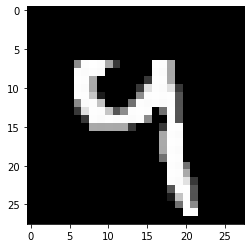

index: 13245
Lable: 6


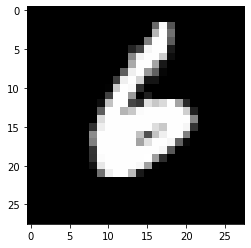

index: 8964
Lable: 4


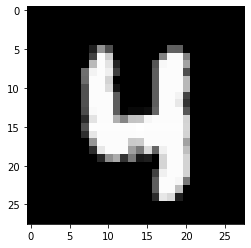

index: 46701
Lable: 9


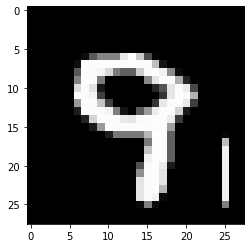

index: 25019
Lable: 9


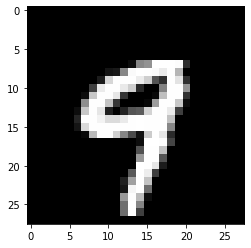

index: 11539
Lable: 3


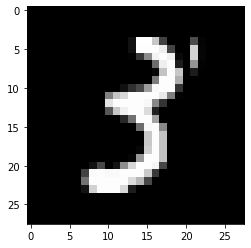

index: 20098
Lable: 4


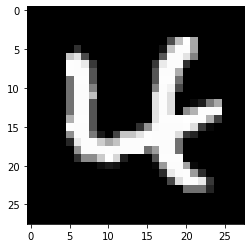

index: 32761
Lable: 4


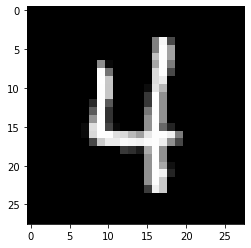

index: 25399
Lable: 0


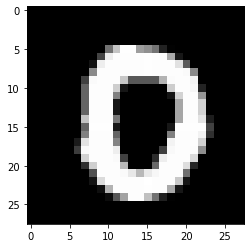

index: 22433
Lable: 9


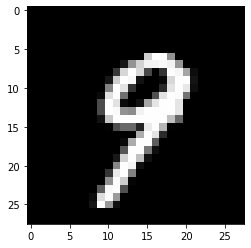

In [19]:
print("Randomly printing 10 images with labels from training dataset")

display_random_images_with_labels(new_dataset[0])

Test Dataset

Randomly printing 10 images with labels from testing dataset
index: 5468
Lable: 3


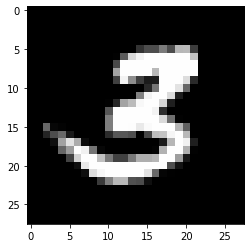

index: 7395
Lable: 1


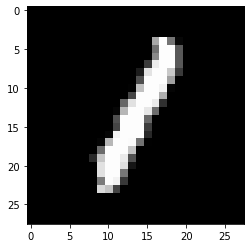

index: 907
Lable: 1


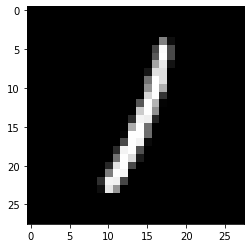

index: 8039
Lable: 4


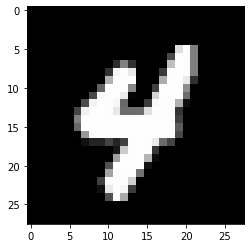

index: 5286
Lable: 6


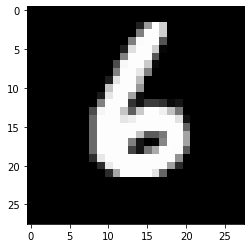

index: 5755
Lable: 6


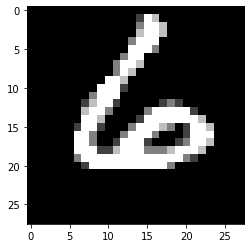

index: 313
Lable: 3


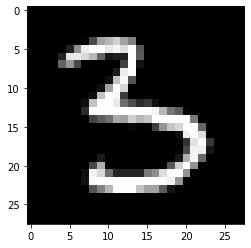

index: 5467
Lable: 6


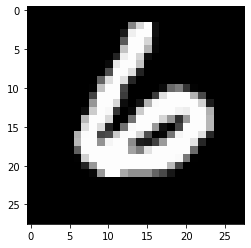

index: 8272
Lable: 3


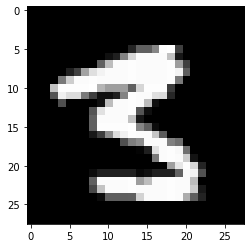

index: 704
Lable: 0


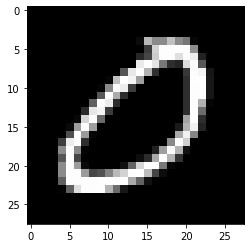

In [20]:
print("Randomly printing 10 images with labels from testing dataset")

display_random_images_with_labels(dataset[1])